In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style as st
import nltk
import re

In [2]:
df = pd.read_csv(r"C:\Users\kumrajes7\Desktop\python\incident _dataset.csv", encoding='latin-1')

In [3]:
df.head()

,Assignment group,Location,Short description,Description
0,Accounts Payable - NA,Tulsa,Accounts Payable Urgent Inquiries - Accounts P...,I am receiving multiple inquiries from vendors...
1,AFG APP Support,Reliable Tech Park-Mumbai,NICE IEX WFM tool unable to launch,"Dear team,\n\nNeed your assistance in NICE IEX..."
2,Application Management,Jefferson Rd-Rochester,Create new test database,"Hi Laurie,\n\nPlease can you copy DB (webInfoS..."
3,Application Management,Airoli-Mumbai,Please apply the patch in live database,"Hi Team,\n\nKindly apply the patch in RPQR aga..."
4,Application Management,Sahara Avenue-Las Vegas,SharePoint website down,Team the below SharePoint is not loading acros...


In [4]:
df.columns

Index(['Assignment group', 'Location', 'Short description', 'Description'], dtype='object')

In [5]:
df.tail()

,Assignment group,Location,Short description,Description
340323,Work At Home,CloudSource - USA,Yubi Key isnt detected.,Yubi Key isnt detected.\n
340324,Work At Home,CloudSource - USA,Yubi Key isnt detected.,Yubi Key isnt detected.\n
340325,Work At Home,CloudSource - USA,Yubi Key isnt detected.,Yubi Key isnt detected.
340326,Work At Home,CloudSource - USA,yubikey Authentication error,Jay S Oertel called and stated that he is unab...
340327,Work At Home,CloudSource - USA,Zoom meeting got logged off.,Megan Wallace reporting that she is getting lo...


In [6]:
df.shape

(340328, 4)

In [7]:
df.isna().any()

Assignment group     False
Location              True
Short description     True
Description           True
dtype: bool

In [8]:
df.isna().sum()

Assignment group       0
Location             174
Short description     55
Description          122
dtype: int64

In [9]:
df['Description'].fillna('Unknown',inplace=True)

In [10]:
df.loc[df['Assignment group'].str.contains('IT Operations','Assignment group')]= 'IT Operations'

In [11]:
df.loc[df['Assignment group'].str.contains('Sec Mgmt','Assignment group')]= 'Sec Mgmt'
df.loc[df['Assignment group'].str.contains('InfoSec','Assignment group')]= 'InfoSec'

df.loc[df['Assignment group'].str.contains('Facilities','Assignment group')]= 'Facilities'

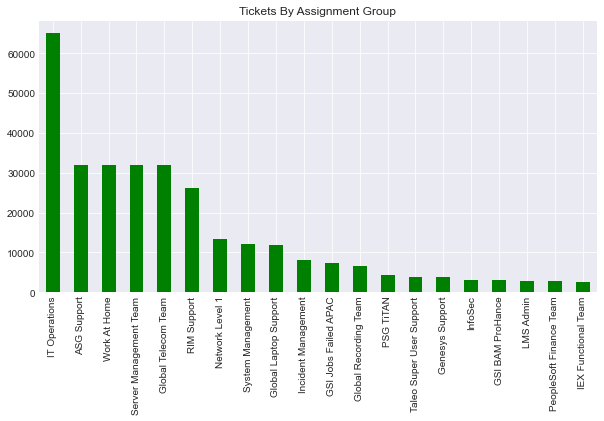

In [12]:
st.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
plt.title("Tickets By Assignment Group")
df['Assignment group'].value_counts().head(20).plot(kind='bar',color='g')
plt.show()

In [13]:
x = df['Description']

In [14]:
x.isna().sum()

0

In [15]:
df['Assignment group'].value_counts().head(20)

IT Operations               65000
ASG Support                 32000
Work At Home                32000
Server Management Team      32000
Global Telecom Team         32000
RIM Support                 26134
Network Level 1             13476
System Management           12109
Global Laptop Support       11785
Incident Management          8043
GSI Jobs Failed APAC         7266
Global Recording Team        6524
PSG TiTAN                    4257
Taleo Super User Support     3911
Genesys Support              3872
InfoSec                      3017
GSI BAM ProHance             3008
LMS Admin                    2925
PeopleSoft Finance Team      2860
IEX Functional Team          2545
Name: Assignment group, dtype: int64

In [16]:
y= df['Assignment group']

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer(stop_words='english',sublinear_tf=True,min_df=5,norm='l2',ngram_range=(1, 2))

In [22]:
x_vect = vectorizer.fit_transform(x)

In [23]:
x_vect.shape

(340328, 142103)

In [24]:
x_features = vectorizer.get_feature_names()


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_vect,y,test_size=0.20,random_state=42)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(272262, 142103)
(272262,)
(68066, 142103)
(68066,)


In [133]:
log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
y_pred = log.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(y_test,y_pred)

0.9396100116414435

In [137]:
newtest = pd.Series(['Iroz is not working. Unable to mark attendance'])

In [138]:
newtest

0    Iroz is not working. Unable to mark attendance
dtype: object

In [139]:
new_trans = vectorizer.transform(newtest)

In [140]:
new_trans.shape

(1, 24713)

In [141]:
log.predict(new_trans)

array(['ASG Support'], dtype=object)

In [142]:
newtest = pd.Series(['Prohance dashboards are not getting updated'])

In [143]:
newtest

0    Prohance dashboards are not getting updated
dtype: object

In [144]:
new_trans = vectorizer.transform(newtest)

In [145]:
new_trans.shape

(1, 24713)

In [146]:
log.predict(new_trans)

array(['GSI BAM ProHance'], dtype=object)

## Assignment Group

In [26]:
def prediction(s,model=log):
    new_test = vectorizer.transform(s)
    predicted = log.predict(new_test)
    return predicted

In [148]:
newtest = pd.Series(['Not able to receive the calls. call getting disconnected often'])

In [149]:
prediction(newtest)

array(['Global Telecom Team'], dtype=object)

In [35]:
from sklearn.metrics import classification_report,accuracy_score

In [151]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

              ASG Support       0.99      0.98      0.98       573
   Application Management       0.00      0.00      0.00         2
           Citrix Support       0.00      0.00      0.00         1
       Cloud Support Team       0.00      0.00      0.00         5
    Data Center Mgmt Team       0.00      0.00      0.00         3
       Fusion HCM Support       0.00      0.00      0.00         2
         GSI BAM ProHance       0.90      0.99      0.94       611
          GSI SQMS Portal       0.00      0.00      0.00         1
      GSI iRoz Attendance       0.00      0.00      0.00         2
             GSI iRoz GTS       0.00      0.00      0.00         2
          Genesys Support       0.89      0.50      0.64        48
    Global Laptop Support       0.83      0.29      0.43        70
    Global Recording Team       1.00      0.62      0.77         8
      Global Telecom Team       0.87      0.93      0.90     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using Naive Bayes

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
mul = MultinomialNB()

In [32]:
mul.fit(x_train,y_train)

MultinomialNB()

In [33]:
y_pred = mul.predict(x_test)

In [36]:
accuracy_score(y_pred,y_test)

0.7789645344224723

In [37]:
def predictionnaive(s,model=mul):
    new_test = vectorizer.transform(s)
    predicted = mul.predict(new_test)
    return predicted

In [60]:
newtest = pd.Series(['Starting Oracle Taleo application...If this message does not disappear shortly, please confirm that Adobe Flash is properly installed on your workstation.'])

In [61]:
predictionnaive(newtest)

array(['RIM Support'], dtype='<U37')

In [56]:
newtest = pd.Series(['Adobe flash not working call back number : 4047180179'])

In [57]:
predictionnaive(newtest)

array(['RIM Support'], dtype='<U37')

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                       precision    recall  f1-score   support

                          ASG Support       0.52      0.96      0.68      6442
                Accounts Payable - NA       0.00      0.00      0.00         1
               Application Management       0.00      0.00      0.00       162
                        Ariba Level 2       0.00      0.00      0.00        28
                     Ariba PS Support       0.00      0.00      0.00        10
                       Citrix Support       0.00      0.00      0.00        11
                   Cloud Support Team       0.00      0.00      0.00        48
                Data Center Mgmt Team       0.00      0.00      0.00       118
                             Database       0.00      0.00      0.00         1
                             Dell FAO       0.00      0.00      0.00        88
                          Dialers ROC       0.00      0.00      0.00         2
                          Dialers Thn       0.00   

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators = 50) `
classifier.fit(x_train, y_train)

In [115]:
y1_pred = classifier.predict(x_test)

In [116]:
accuracy_score(y_test,y1_pred)

0.9369906868451688

In [117]:
print(classification_report(y_test,y1_pred))

                           precision    recall  f1-score   support

              ASG Support       1.00      0.96      0.98       573
   Application Management       0.00      0.00      0.00         2
           Citrix Support       0.00      0.00      0.00         1
       Cloud Support Team       0.00      0.00      0.00         5
    Data Center Mgmt Team       0.50      0.67      0.57         3
       Fusion HCM Support       0.00      0.00      0.00         2
         GSI BAM ProHance       0.79      0.99      0.88       611
          GSI SQMS Portal       0.00      0.00      0.00         1
      GSI iRoz Attendance       0.00      0.00      0.00         2
             GSI iRoz GTS       0.00      0.00      0.00         2
          Genesys Support       0.81      0.35      0.49        48
    Global Laptop Support       0.80      0.34      0.48        70
    Global Recording Team       1.00      0.50      0.67         8
      Global Telecom Team       0.92      0.90      0.91     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
report = classification_report(y_test,y1_pred,output_dict=True)

In [119]:
reportdf = pd.DataFrame(report).transpose()

In [120]:
display(reportdf)

,precision,recall,f1-score,support
ASG Support,1.000000,0.961606,0.980427,573.000000
Application Management,0.000000,0.000000,0.000000,2.000000
Citrix Support,0.000000,0.000000,0.000000,1.000000
Cloud Support Team,0.000000,0.000000,0.000000,5.000000
Data Center Mgmt Team,0.500000,0.666667,0.571429,3.000000
Fusion HCM Support,0.000000,0.000000,0.000000,2.000000
GSI BAM ProHance,0.791885,0.990180,0.880000,611.000000
GSI SQMS Portal,0.000000,0.000000,0.000000,1.000000
GSI iRoz Attendance,0.000000,0.000000,0.000000,2.000000
GSI iRoz GTS,0.000000,0.000000,0.000000,2.000000


In [121]:
reportdf['precision'] = round((reportdf['precision']*100),2)

In [122]:
reportdf['precision']

ASG Support                  100.00
Application Management         0.00
Citrix Support                 0.00
Cloud Support Team             0.00
Data Center Mgmt Team         50.00
Fusion HCM Support             0.00
GSI BAM ProHance              79.19
GSI SQMS Portal                0.00
GSI iRoz Attendance            0.00
GSI iRoz GTS                   0.00
Genesys Support               80.95
Global Laptop Support         80.00
Global Recording Team        100.00
Global Telecom Team           92.31
Global VDI Team                0.00
IEX Functional Team          100.00
IT Operations                100.00
IT Security Team               0.00
Incident Management           90.91
Infosec DLP Team             100.00
Kronos Support               100.00
LMS Admin                    100.00
Network Level 1               88.89
Network Level 2               80.00
PSG GPC AP SmartLeap           0.00
PSG HCHC SmartAP               0.00
PSG Smart RPA Support         95.62
PSG TiTAN                   

In [123]:
def predictionclass(s,model=classifier):
    new_test = vectorizer.transform(s)
    predicted = classifier.predict(new_test)
    return predicted

In [124]:
new_test = pd.Series(['not able to receive the calls. Calls getting disconnecting often'])

In [125]:
test_result = predictionclass(new_test)

In [126]:
test_result = test_result.tolist()

In [127]:
test_result[0]

'Global Telecom Team'

In [128]:
pred_acc = reportdf.loc[test_result[0]]['precision']

In [129]:
if pred_acc >=80:
    print ("predicted good assignment group")
else:
    print("Have to reconsider")

predicted good assignment group
